In [86]:
#Jason Pinto
#4-8-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import json
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', 100)

In [2]:
by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv').astype({'dt':'datetime64','AverageTemperature':'float32', \
                                    'AverageTemperatureUncertainty':'float32'}).rename(columns={'dt':'Date'})
                                    
by_country['Year']= by_country['Date'].dt.year
by_country['Month']= by_country['Date'].dt.month
by_country = by_country.astype({'Year':'int32','Month':'int32'})
                                    

In [3]:
by_country.head(5)

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1
3,1744-02-01,NaN,NaN,Åland,1744,2
4,1744-03-01,NaN,NaN,Åland,1744,3


In [4]:
by_country.dtypes

Date                             datetime64[ns]
AverageTemperature                      float32
AverageTemperatureUncertainty           float32
Country                                  object
Year                                      int32
Month                                     int32
dtype: object

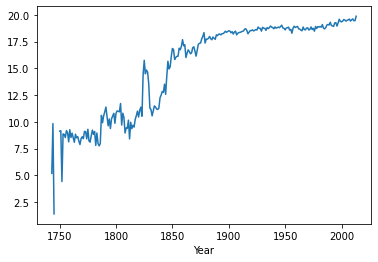

In [5]:
by_country.groupby('Year').mean()['AverageTemperature'].plot()
plt.show()

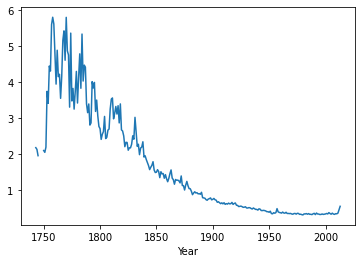

In [6]:
by_country.groupby('Year').mean()['AverageTemperatureUncertainty'].plot()
plt.show()

In [7]:
by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv').astype({'dt':'datetime64','AverageTemperature':'float32', \
                                    'AverageTemperatureUncertainty':'float32'}).rename(columns={'dt':'Date'})
                                    
by_city['Year']= by_city['Date'].dt.year
by_city['Month']= by_city['Date'].dt.month
by_city = by_city.astype({'Year':'int32','Month':'int32'})

In [8]:
by_city.query("Country == 'United States'")

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
47555,1820-01-01,2.101000,3.217,Abilene,United States,32.95N,100.53W,1820,1
47556,1820-02-01,6.926000,2.853,Abilene,United States,32.95N,100.53W,1820,2
47557,1820-03-01,10.767000,2.395,Abilene,United States,32.95N,100.53W,1820,3
47558,1820-04-01,17.989000,2.202,Abilene,United States,32.95N,100.53W,1820,4
47559,1820-05-01,21.809000,2.036,Abilene,United States,32.95N,100.53W,1820,5
...,...,...,...,...,...,...,...,...,...
8439242,2013-05-01,15.544000,0.281,Yonkers,United States,40.99N,74.56W,2013,5
8439243,2013-06-01,20.892000,0.273,Yonkers,United States,40.99N,74.56W,2013,6
8439244,2013-07-01,24.722000,0.279,Yonkers,United States,40.99N,74.56W,2013,7
8439245,2013-08-01,21.000999,0.323,Yonkers,United States,40.99N,74.56W,2013,8


In [14]:
globaltemp_df = pd.read_csv("GlobalTemperatures.csv").astype({'dt':'datetime64'}).rename(columns={'dt':'Date'})
globaltemp_df['Year']= globaltemp_df['Date'].dt.year
globaltemp_df['Month']= globaltemp_df['Date'].dt.month
globaltemp_df.head(5)

,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


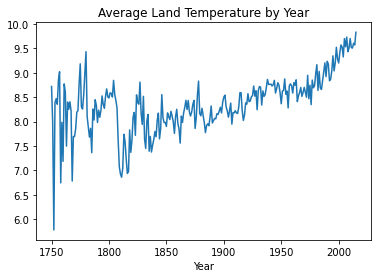

In [18]:
globaltemp_df.groupby('Year').mean()['LandAverageTemperature'].plot()
plt.title('Average Land Temperature by Year')
plt.show()

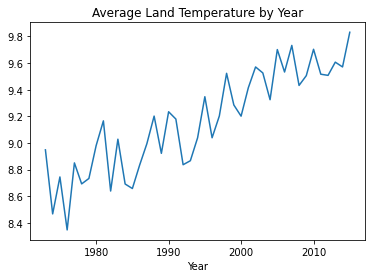

In [85]:
globaltemp_df.query('Year >= 1973').groupby('Year').mean()['LandAverageTemperature'].plot()
plt.title('Average Land Temperature by Year')
plt.show()

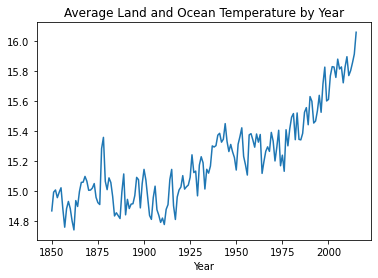

In [17]:
globaltemp_df.groupby('Year').mean()['LandAndOceanAverageTemperature'].plot()
plt.title('Average Land and Ocean Temperature by Year')
plt.show()

In [19]:
df_fuel = pd.read_csv("annual-change-fossil-fuels-coal-gas-oil.csv")
df_fuel.rename(columns = {'Entity':'Country', 'Fossil.fuels..TWh.growth...sub.method.':'FossilFuelGrowth', 
                          'Coal..TWh.growth...sub.method.':'CoalGrowth', 'Gas..TWh.growth...sub.method.':'GasGrowth',
                         'Oil..TWh.growth...sub.method.':'OilGrowth'}, inplace = True)
df_fuel.head(5)

,Code,Year,Country,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,region,sub.region
0,ARE,1977,United Arab Emirates,19.441,0.000,14.040,5.401,Asia,Western Asia
1,ARE,1978,United Arab Emirates,7.680,0.000,6.143,1.537,Asia,Western Asia
2,ARE,2006,United Arab Emirates,36.862,1.584,12.773,22.506,Asia,Western Asia
3,ARE,2011,United Arab Emirates,53.288,-2.479,23.645,32.122,Asia,Western Asia
4,ARE,1979,United Arab Emirates,10.060,0.000,3.413,6.647,Asia,Western Asia


In [37]:
df = df_fuel.merge(by_country,on=["Country","Year"]).reset_index() #.groupby('Year').mean()
df.head(2)

,index,Code,Year,Country,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,region,sub.region,Date,AverageTemperature,AverageTemperatureUncertainty,Month
0,0,ARE,1977,United Arab Emirates,19.441,0.0,14.04,5.401,Asia,Western Asia,1977-01-01,17.583,0.445,1
1,1,ARE,1977,United Arab Emirates,19.441,0.0,14.04,5.401,Asia,Western Asia,1977-02-01,20.843,0.535,2


In [38]:
natural_resources = pd.read_csv("natural-resources.csv").rename(columns={'Entity':'Country'})
natural_resources = natural_resources[["Year","Country","Gas consumption","Coal consumption","Oil consumption","Population"]]
df = df.merge(natural_resources,on=['Year','Country'])
df = df.drop('index',axis=1)

In [77]:
df_1 = df[["Year","Country","Population","Date","Month","Gas consumption","Coal consumption","Oil consumption"]]
df_1

,Year,Country,Population,Date,Month,Gas consumption,Coal consumption,Oil consumption
0,1977,United Arab Emirates,735300.0,1977-01-01,1,NaN,NaN,NaN
1,1977,United Arab Emirates,735300.0,1977-02-01,2,NaN,NaN,NaN
2,1977,United Arab Emirates,735300.0,1977-03-01,3,NaN,NaN,NaN
3,1977,United Arab Emirates,735300.0,1977-04-01,4,NaN,NaN,NaN
4,1977,United Arab Emirates,735300.0,1977-05-01,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
30355,1981,South Africa,29330000.0,1981-08-01,8,0.0,97930000.0,18810000.0
30356,1981,South Africa,29330000.0,1981-09-01,9,0.0,97930000.0,18810000.0
30357,1981,South Africa,29330000.0,1981-10-01,10,0.0,97930000.0,18810000.0
30358,1981,South Africa,29330000.0,1981-11-01,11,0.0,97930000.0,18810000.0


In [78]:
yearly_avg = df_1.set_index("Year").groupby("Year").mean()
yearly_avg['Gas consumption'] = df_1.groupby(['Year','Country'])['Gas consumption'].mean().groupby('Year').sum()
yearly_avg['Coal consumption'] = df_1.groupby(['Year','Country'])['Coal consumption'].mean().groupby('Year').sum()
yearly_avg['Oil consumption'] = df_1.groupby(['Year','Country'])['Oil consumption'].mean().groupby('Year').sum()
yearly_avg['log_Gas'] = np.log(yearly_avg['Gas consumption'])
yearly_avg['log_Coal'] = np.log(yearly_avg['Coal consumption'])
yearly_avg['log_Oil'] = np.log(yearly_avg['Oil consumption'])
yearly_avg['Population'] = df_1.groupby(['Year','Country'])['Population'].mean().groupby('Year').sum()
yearly_avg = yearly_avg.drop('Month',axis=1)
global_temps = globaltemp_df.groupby('Year').mean().reset_index().query("Year >= 1973").drop("Month",axis=1)
yearly_avg = yearly_avg.merge(global_temps,on="Year")
yearly_avg.tail(3)

/home/jpinto/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jpinto/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year,Population,Gas consumption,Coal consumption,Oil consumption,log_Gas,log_Coal,log_Oil,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
38,2011,5.785305e+09,3.264771e+12,7.729972e+09,4.904080e+09,28.814211,22.768371,22.313333,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
39,2012,5.842192e+09,3.333059e+12,7.961497e+09,4.973526e+09,28.834912,22.797883,22.327395,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
40,2013,5.898015e+09,3.373866e+12,8.033213e+09,5.051871e+09,28.847080,22.806850,22.343024,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


In [81]:
yearly_avg.head(5)

,Year,Population,Gas consumption,Coal consumption,Oil consumption,log_Gas,log_Coal,log_Oil,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1973,1.581200e+09,0.0,0.0,1.799800e+09,-inf,-inf,21.310941,8.948250,0.100750,14.566000,0.131250,3.370167,0.120000,15.404750,0.054917
1,1974,1.609937e+09,0.0,0.0,1.739600e+09,-inf,-inf,21.276921,8.467500,0.104500,14.081917,0.122667,2.900917,0.118583,15.168083,0.056250
2,1975,1.637396e+09,0.0,0.0,1.668900e+09,-inf,-inf,21.235431,8.744833,0.097083,14.383667,0.133250,3.121083,0.127750,15.238667,0.055333
3,1976,1.663586e+09,0.0,0.0,1.765400e+09,-inf,-inf,21.291643,8.347250,0.100583,14.008000,0.150750,2.734167,0.143083,15.131083,0.057417
4,1977,1.688328e+09,0.0,0.0,1.814800e+09,-inf,-inf,21.319241,8.850250,0.084667,14.485500,0.125000,3.294583,0.142917,15.408250,0.053000


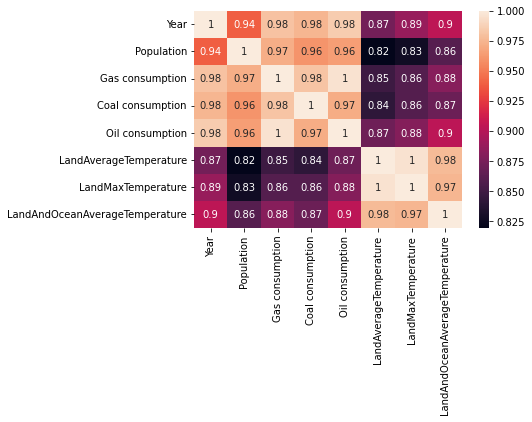

In [82]:
ax = sns.heatmap(yearly_avg[['Year','Population','Gas consumption', \
                             'Coal consumption','Oil consumption','LandAverageTemperature', \
                            'LandMaxTemperature','LandAndOceanAverageTemperature']].corr(), annot=True)

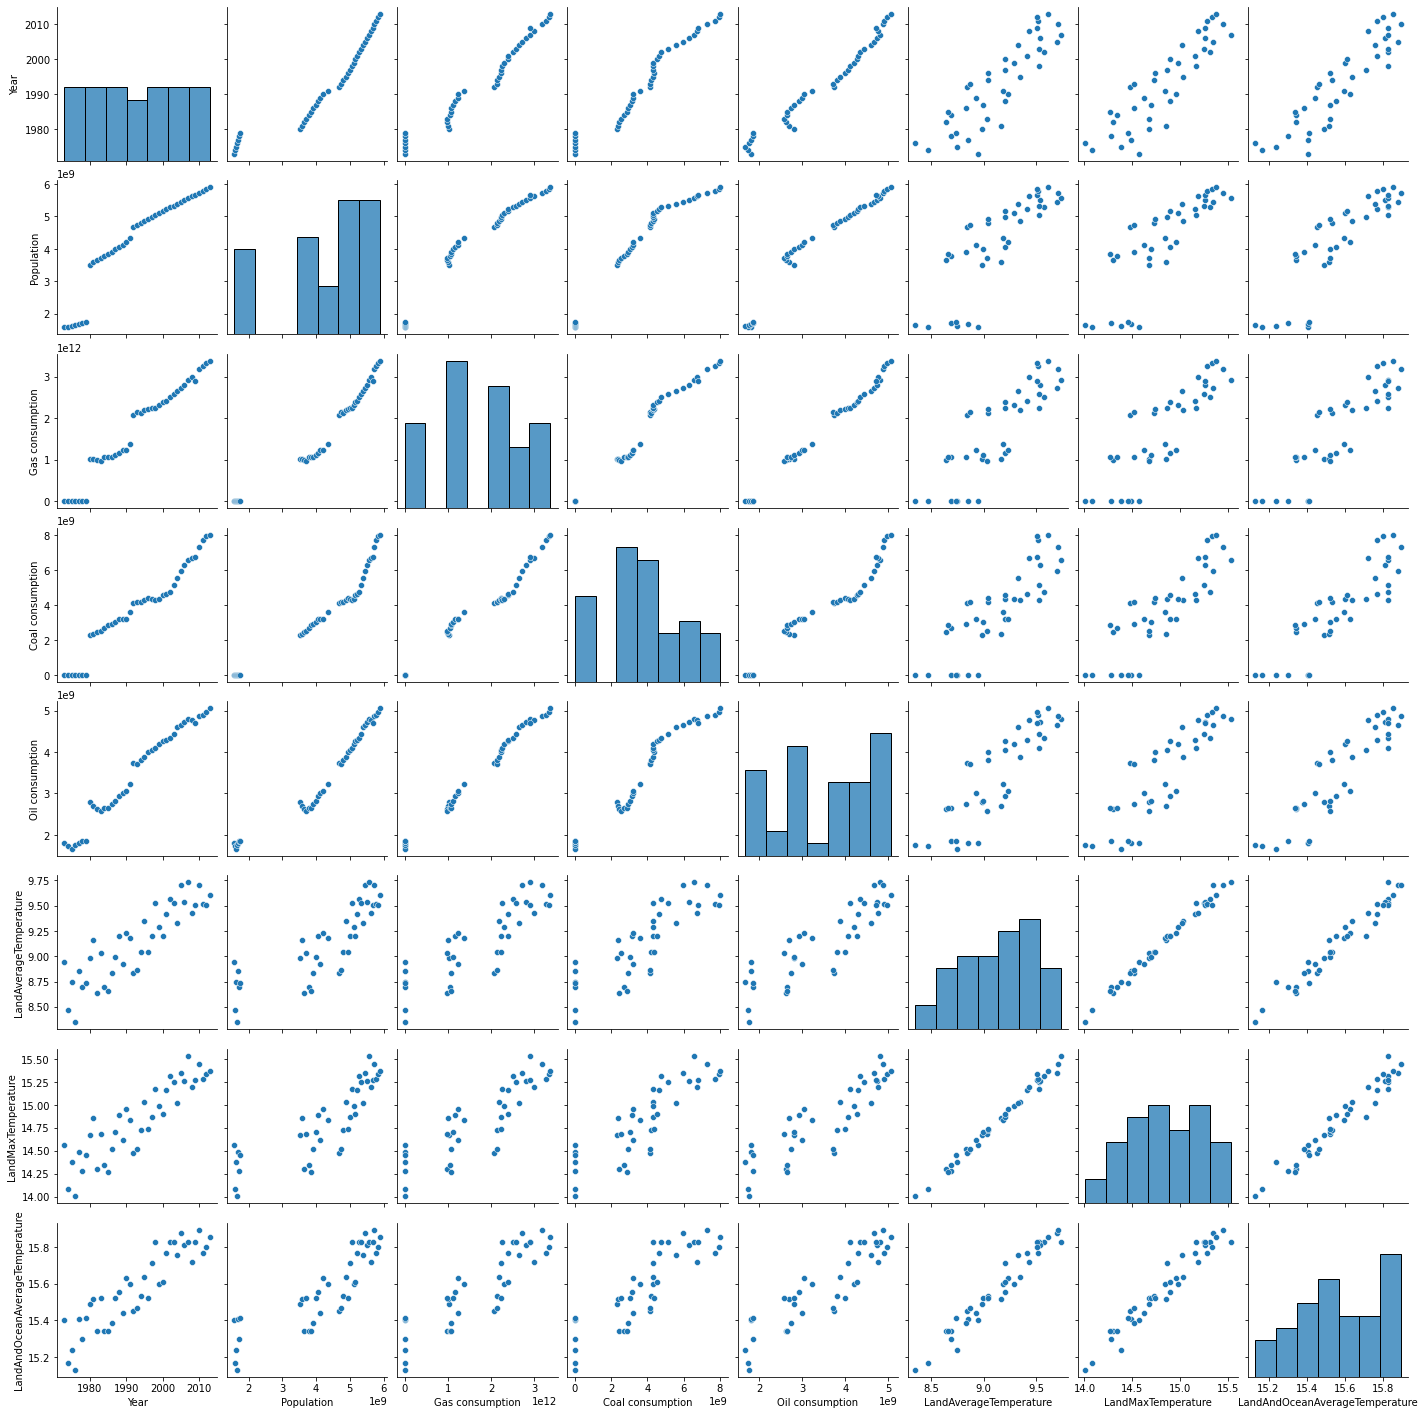

In [83]:
g = sns.pairplot(yearly_avg[['Year','Population','Gas consumption', \
                             'Coal consumption','Oil consumption','LandAverageTemperature', \
                            'LandMaxTemperature','LandAndOceanAverageTemperature']])